In [1]:
### Social Recognition Data Analysis ###

# Import the dataset
import pandas as pd
soc_rec = pd.read_csv("./soc_rec_dataset.csv") 


In [2]:
# Clean up the dataset

rows_to_drop = [48, 49, 50, 51]
soc_rec_clean = soc_rec.drop(rows_to_drop, axis=0, errors='ignore') # remove empty rows

columns_to_drop = ['Unnamed: 7', 'Unnamed: 8', 'Unnamed: 11', 'Latency (female 1)', 'Duration (female 1)']
soc_rec_clean = soc_rec_clean.drop(columns_to_drop, axis=1, errors='ignore') # remove empty & unnecessary columns

soc_rec_clean = soc_rec_clean.rename(columns={
    "Individual no.": "ID",
    "Latency (approach novel mouse)": "Latency_Novel",
    "Duration (exploration - novel mouse)": "Duration_Novel",
    "Latency (approach familiar mouse)": "Latency_Familiar",
    "Duration (exploration - familiar mouse)": "Duration_Familiar" 
}) # rename columns for clarity

soc_rec_clean = soc_rec_clean.set_index("ID") # set index as animal IDs

soc_rec_clean # verify changes

,Species,Population,Latency_Novel,Duration_Novel,Latency_Familiar,Duration_Familiar
ID,,,,,,
1,R. pumilio,Goegap,10.0,51.20,5.0,61.00
2,R. pumilio,Goegap,3.0,43.20,11.0,41.13
3,R. pumilio,Goegap,4.0,53.40,3.0,33.50
4,R. pumilio,Goegap,3.0,53.40,4.0,62.30
5,R. pumilio,Goegap,2.0,44.50,3.0,63.50
6,R. pumilio,Goegap,3.0,59.20,5.0,103.20
7,R. pumilio,Goegap,4.0,62.30,4.0,63.50
8,R. pumilio,Goegap,5.0,54.20,6.0,92.10
9,R. pumilio,Goegap,3.0,59.30,5.0,60.30


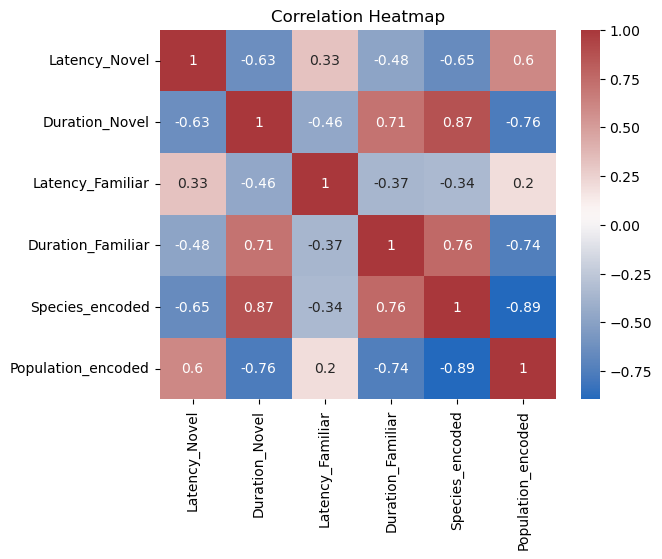

In [11]:
### Correlation analysis

from sklearn.preprocessing import LabelEncoder

# encode non-numerical columns
label_encoder = LabelEncoder()
soc_rec_clean['Species_encoded'] = label_encoder.fit_transform(soc_rec_clean['Species'])
soc_rec_clean['Population_encoded'] = label_encoder.fit_transform(soc_rec_clean['Population'])

numeric_cols = soc_rec_clean.select_dtypes(include=['number'])  # select only numeric columns

# calculate correlation matrix
correlation_matrix = numeric_cols.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="vlag")
plt.title("Correlation Heatmap")
plt.show()


In [3]:
### Compare the behaviour of the two mouse species

soc_rec_clean.groupby("Species").mean(numeric_only = True) # compare the mean values of each species

,Latency_Novel,Duration_Novel,Latency_Familiar,Duration_Familiar
Species,,,,
R. d. chakae,9.583333,10.870833,6.625,21.233333
R. pumilio,4.458333,57.772500,4.500,65.234583


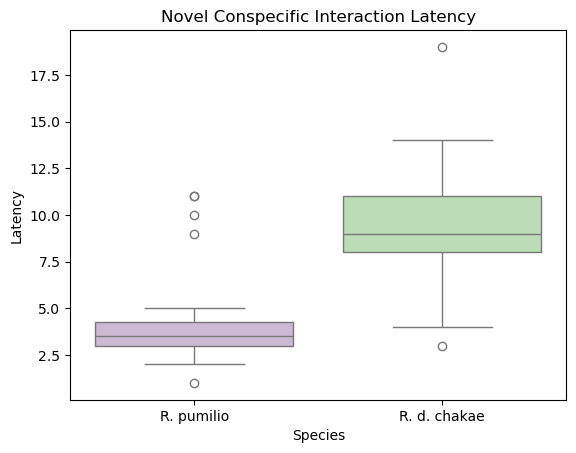

In [4]:
# Visualise the difference in latency (novel condition) between the species

import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x="Species", y="Latency_Novel", data=soc_rec_clean, palette="PRGn", hue="Species", legend=False)
plt.ylabel("Latency")
plt.title("Novel Conspecific Interaction Latency") 

plt.show()


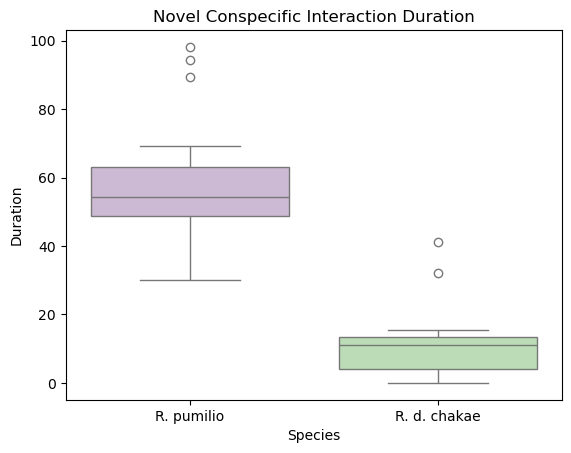

In [5]:
# Visualise the difference in duration (novel condition) between the species

sns.boxplot(x="Species", y="Duration_Novel", data=soc_rec_clean, palette="PRGn", hue="Species", legend=False)
plt.ylabel("Duration")
plt.title("Novel Conspecific Interaction Duration")
plt.show()

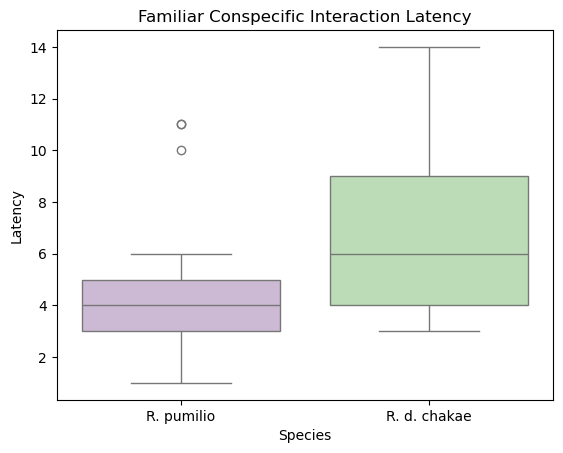

In [6]:
# Visualise the difference in latency (familiar condition) between the species
sns.boxplot(x="Species", y="Latency_Familiar", data=soc_rec_clean, palette="PRGn", hue="Species", legend=False)
plt.ylabel("Latency")
plt.title("Familiar Conspecific Interaction Latency")
plt.show()

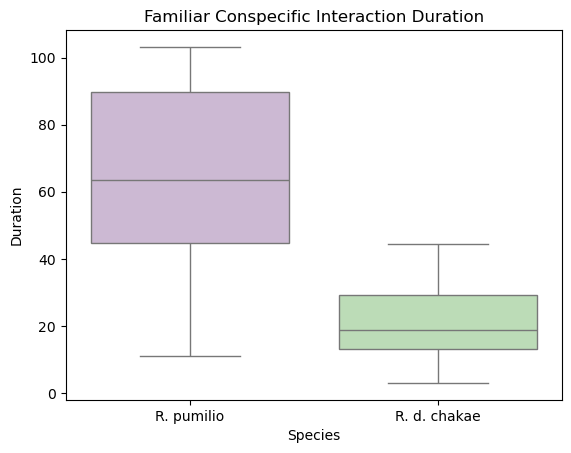

In [7]:
# Visualise the difference in duration (familiar condition) between the species
sns.boxplot(x="Species", y="Duration_Familiar", data=soc_rec_clean, palette="PRGn", hue="Species", legend=False)
plt.ylabel("Duration")
plt.title("Familiar Conspecific Interaction Duration")
plt.show()

In [13]:
### Compare data for novel and familiar paradigms

from scipy.stats import ttest_rel

# Paired t-test for latency
latency_ttest = ttest_rel(
    soc_rec_clean["Latency_Novel"],
    soc_rec_clean["Latency_Familiar"]
)
print("Latency t-test:", latency_ttest)

# Paired t-test for duration
duration_ttest = ttest_rel(
    soc_rec_clean["Duration_Novel"],
    soc_rec_clean["Duration_Familiar"]
)
print("Duration t-test:", duration_ttest)


Latency t-test: TtestResult(statistic=2.4190313293580745, pvalue=0.019486559819893518, df=47)
Duration t-test: TtestResult(statistic=-2.847298118659573, pvalue=0.006518482291660379, df=47)


In [111]:
# Assess normality of data

from scipy.stats import shapiro

stat, p = shapiro(soc_rec_clean['Duration_Familiar'])
print(f"Shapiro-Wilk Test Statistic: {stat}, P-value: {p}")

if p > 0.05:
    print("Data appears to be normally distributed")
else:
    print("Data does not appear to be normally distributed")

Shapiro-Wilk Test Statistic: 0.9120228518537171, P-value: 0.00157356358384173
Data does not appear to be normally distributed


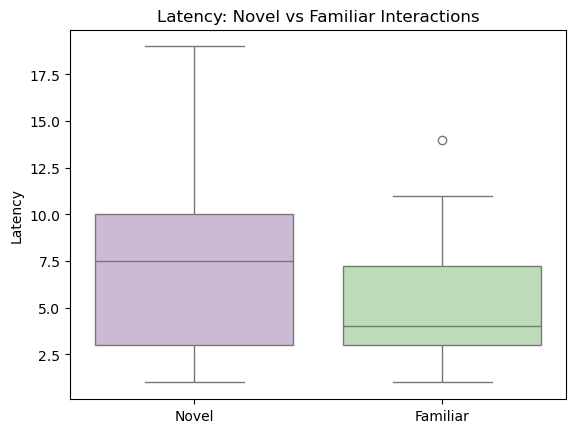

In [16]:
# Visualise latency between novel and familiar conditions


latency_nov = soc_rec_clean["Latency_Novel"]
latency_fam = soc_rec_clean["Latency_Familiar"]


sns.boxplot(data=[latency_nov, latency_fam], palette="PRGn")
plt.xticks([0, 1], ["Novel", "Familiar"])
plt.title("Latency: Novel vs Familiar Interactions")
plt.ylabel("Latency")

plt.show()

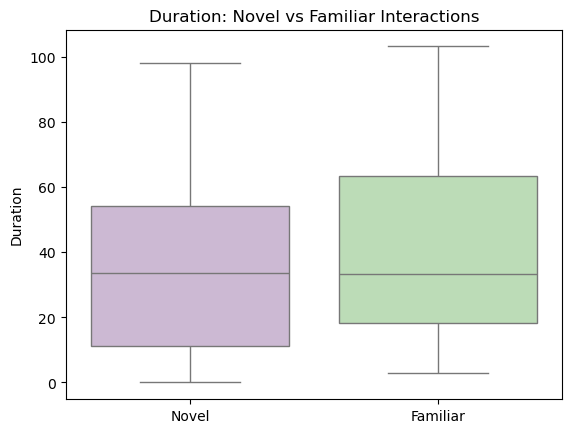

In [14]:
# Compare duration between novel and familiar conditions


duration_nov = soc_rec_clean["Duration_Novel"]
duration_fam = soc_rec_clean["Duration_Familiar"]


sns.boxplot(data=[duration_nov, duration_fam], palette="PRGn")
plt.xticks([0, 1], ["Novel", "Familiar"])
plt.title("Duration: Novel vs Familiar Interactions")
plt.ylabel("Duration")

plt.show()


In [19]:
### Compare populations of mice
# Data was not normally distributed so use non-parametric test
# Kruskal-Wallis test loop function

from scipy.stats import kruskal

# Define reusable function
def test_kruskal_wallis(df, group_col, test_cols):
  
    results = []
    populations = df[group_col].unique()
    
    for col in test_cols:
        # Extract data groups for the given column
        data_groups = [df[df[group_col] == pop][col].dropna() for pop in populations]
        
        # Perform Kruskal-Wallis test
        h_stat, p_val = kruskal(*data_groups)
        
        # Append results
        results.append({'Variable': col, 'H-statistic': h_stat, 'P-value': p_val})
    
    return pd.DataFrame(results)

# Specify the test columns
test_columns = ['Duration_Novel', 'Latency_Familiar', 'Duration_Familiar', 'Latency_Novel']

# Perform the Kruskal-Wallis test
results = test_kruskal_wallis(soc_rec_clean, group_col='Population', test_cols=test_columns)

# Display results
print(results)

            Variable  H-statistic       P-value
0     Duration_Novel    34.707863  1.404266e-07
1   Latency_Familiar     9.893234  1.949583e-02
2  Duration_Familiar    30.754938  9.572749e-07
3      Latency_Novel    18.892297  2.877817e-04


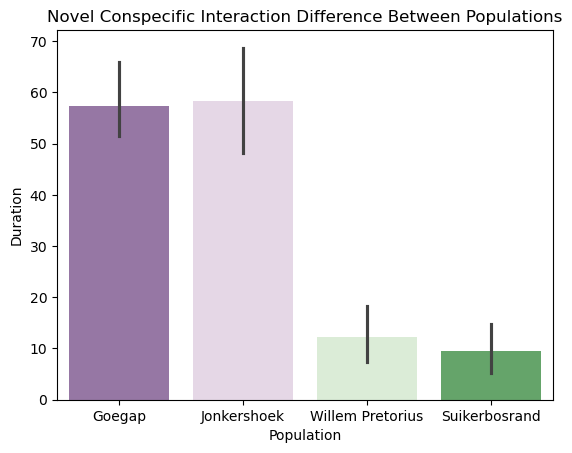

In [17]:
# Visualise novel paradigm duration values between populations
sns.barplot(x="Population", y="Duration_Novel", data=soc_rec_clean, palette='PRGn', hue="Population", legend=False)
plt.ylabel("Duration") 
plt.title("Novel Conspecific Interaction Difference Between Populations") # add title
plt.show()

In [ ]:
# Visualise familiarparadigm values between populations

sns.barplot(x="Population", y="Duration_Familiar", data=soc_rec_clean, palette='PRGn', hue="Population", legend=False)
plt.ylabel("Duration") # change y axis label
plt.title("Familiar Conspecific Interaction Difference Between Populations") # add title
plt.show()
